In [1]:
# load and display an image with Matplotlib
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker


from matplotlib.widgets import Slider

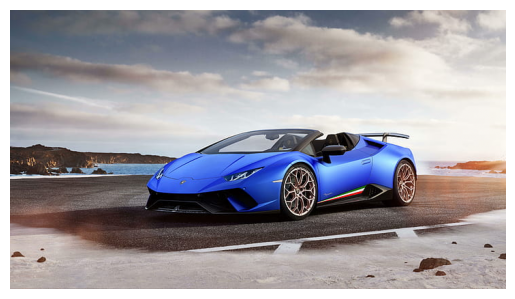

In [2]:
# load image as pixel array
# An image of a file opens
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "lamborghini.jpg")) / 255

plt.imshow(image)
plt.axis('off')  # Para desactivar los ejes en la visualización
plt.show()

In [3]:
class Luminancia:
    
    def __init__(self):
        
        pass   

    def rgb_to_yiq(self, img):

        modified_img = np.copy(img)

        heigth, width, channels = modified_img.shape

        for i in range(heigth):
    
            for j in range(width):

                r, g, b = modified_img[i, j]

                change_y = 0.299 * r + 0.587 * g + 0.114 * b
                change_i = 0.595716 * r - 0.274453 * g - 0.321263 * b
                change_q = 0.211456 * r - 0.522591 * g + 0.311135 * b

                modified_img[i, j] = [change_y, change_i + 0.5, change_q + 0.5]  
                
        return modified_img

    def yiq_to_rgb(self, img):

        modified_img = np.copy(img)

        heigth, width, channels = modified_img.shape

        for a in range(heigth):
    
            for b in range(width):
                
                y, i, q = modified_img[a, b]
        
                i -= 0.5
                q -= 0.5
        
                change_r = y + 0.9663 * i + 0.6210 * q
        
                change_g = y - 0.2721 * i - 0.6474 * q
        
                change_b = y - 1.1070 * i + 1.7046 * q        
                
                modified_img[a, b] = [change_r, change_g, change_b]
                
        return modified_img
    
    def search(self, lista, element):
        
        band = False
        
        pos = 0
        
        while not band and pos < len(lista) - 1:
            
            if element >= lista[pos][0] and element < lista[pos][1]:
                
                band = True

                return pos
            
            else: 
                
                pos += 1        

        return -1
        
    
    def histogram(self, yimg, n):
        
        heigth, width, channels = yimg.shape
        
        rangos = [(round((1 / n) * x, 2), round((1 / n) * x + (1 / n), 2)) for x in range(0, n)]
        
        contador = [0 for y in range(0, n)]
        
        for i in range(heigth):
    
            for j in range(width):
                
                num = self.search(rangos, yimg[i, j, 0])

                if num > -1:
                    
                    contador[num] += 1
        
        intervalos_x = [(i[0] + i[1]) / 2 for i in rangos]
        
        frecuencias_y = contador
        
        plt.figure(figsize=(8, 4))
        
        plt.bar(intervalos_x, frecuencias_y, width=1/n, edgecolor='black')
        plt.xlabel('Intervalos')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de Luminancia')
        plt.xticks(np.arange(0, 1.1, step=0.1))
            
        plt.grid(False)
        plt.show()

    def relative(self, yimg, n):
        
        heigth, width, channels = yimg.shape
        
        rangos = [(round((1 / n) * x, 2), round((1 / n) * x + (1 / n), 2)) for x in range(0, n)]
        
        contador = [0 for y in range(0, n)]
        
        for i in range(heigth):
    
            for j in range(width):
                
                num = self.search(rangos, yimg[i, j, 0])
                
                contador[num] += 1

        contador = [(c / (heigth * width)) * 100 for c in contador]
        
        intervalos_x = [(i[0] + i[1]) / 2 for i in rangos]
        
        frecuencias_y = contador
        
        plt.figure(figsize=(8, 4))
        
        plt.bar(intervalos_x, frecuencias_y, width=1/n, edgecolor='black')
        plt.xlabel('Intervalos')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de Luminancia')
        plt.xticks(np.arange(0, 1.1, step=0.1))

        plt.ylim(0, 100)  # Establecer límites en el eje y de 0 a 100
            
        plt.grid(False)
        plt.show()

    def lum_transform(self, img, high=False):

        heigth, width, channels = img.shape

        for a in range(heigth):
    
            for b in range(width):
                
                y, i, q = img[a, b]
        
                y = y**2 if high else y**(1/2)      
                
                img[a, b] = [y, i, q]
                
        return img

    def interpolacion(self, img1, y1):

        y2 =  (y1 - img1[:, :, 0].min()) / (img1[:, :, 0].max() - img1[:, :, 0].min())

        return y2

    def trozos(self, img):

        heigth, width, channels = img.shape

        for a in range(heigth):
    
            for b in range(width):
                
                y, i, q = img[a, b]
        
                yn = 0 if y < img[:, :, 0].min() else (1 if y > img[:, :, 0].max() else self.interpolacion(img, y))    
                
                img[a, b] = [yn, i, q]
                
        return img 
        

In [4]:
lum = Luminancia()

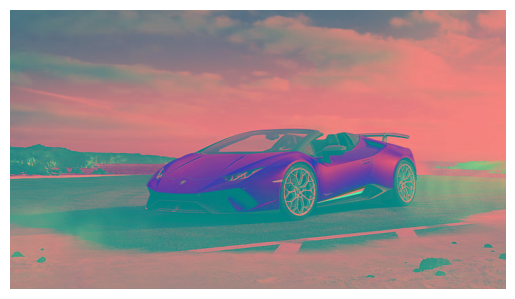

In [5]:
wall_yiq_img = lum.rgb_to_yiq(image)

wall_yiq_img = np.clip(wall_yiq_img, 0, 1)

plt.imshow(wall_yiq_img)
plt.axis("off")
plt.show()

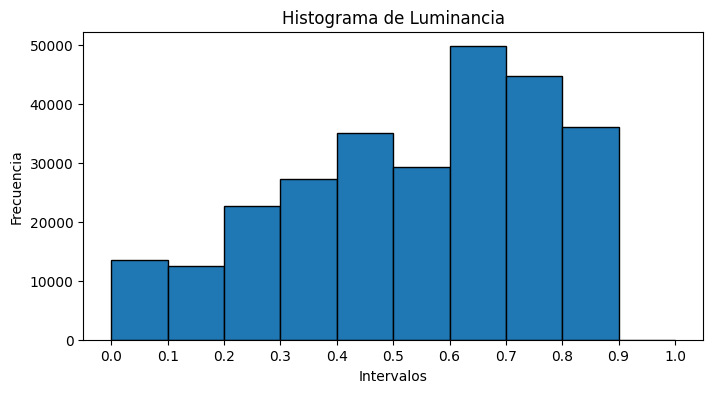

In [6]:
lum.histogram(wall_yiq_img, 10)

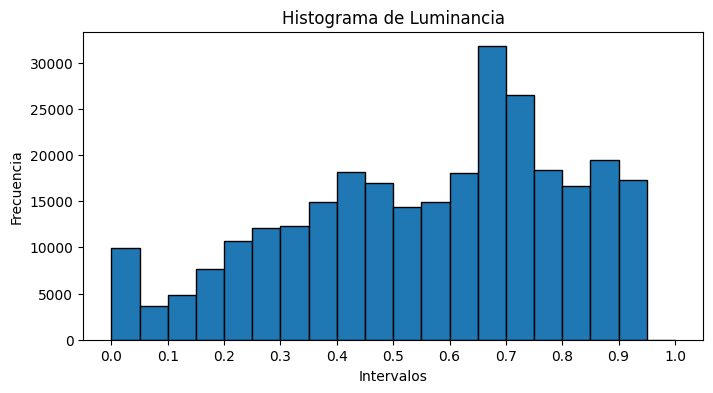

In [7]:
lum.histogram(wall_yiq_img, 20)

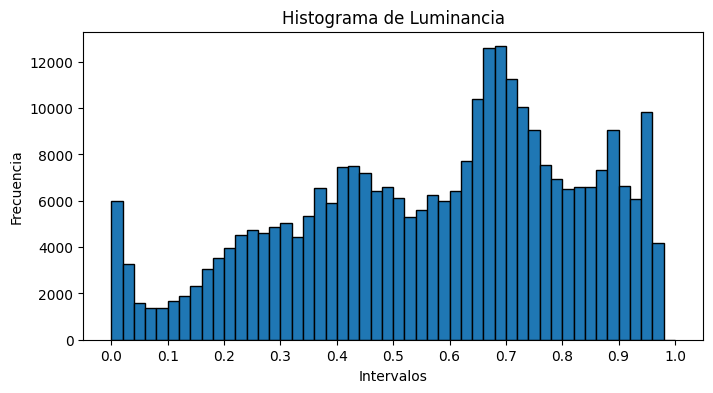

In [8]:
lum.histogram(wall_yiq_img, 50)

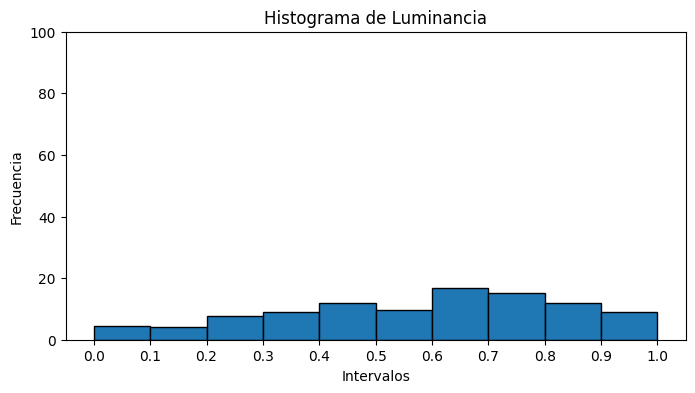

In [9]:
lum.relative(wall_yiq_img, 10)

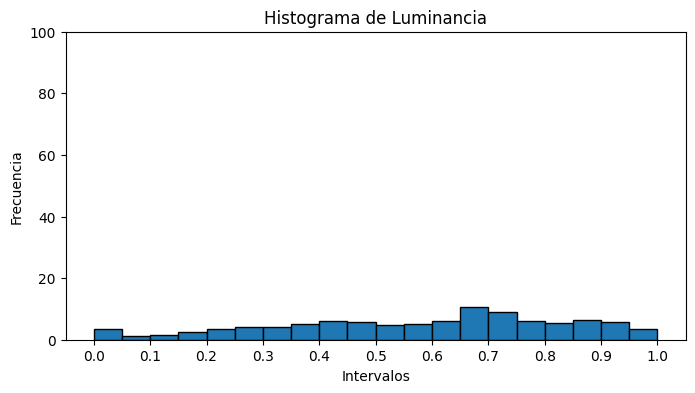

In [10]:
lum.relative(wall_yiq_img, 20)

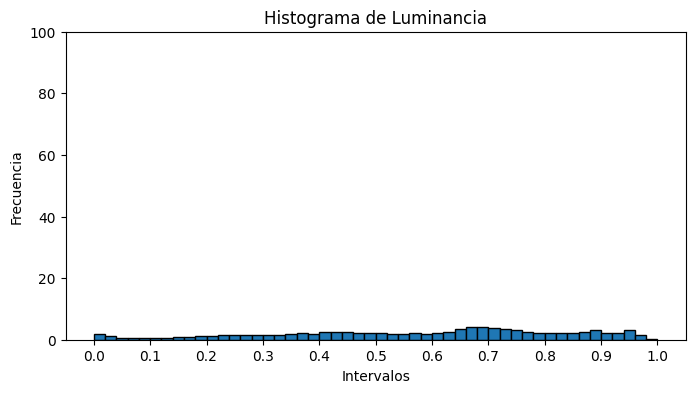

In [11]:
lum.relative(wall_yiq_img, 50)

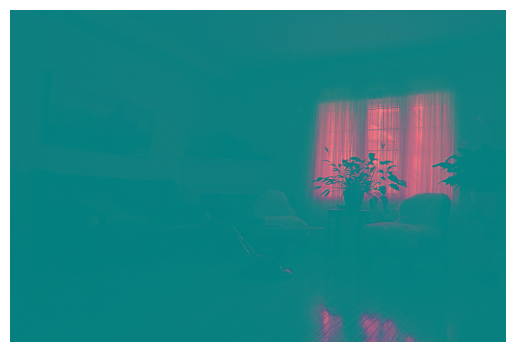

In [12]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "low_luminance.jpg")) / 255

low_yiq_img = lum.rgb_to_yiq(image)

low_yiq_img = np.clip(low_yiq_img, 0, 1)

plt.imshow(low_yiq_img)
plt.axis("off")
plt.show()

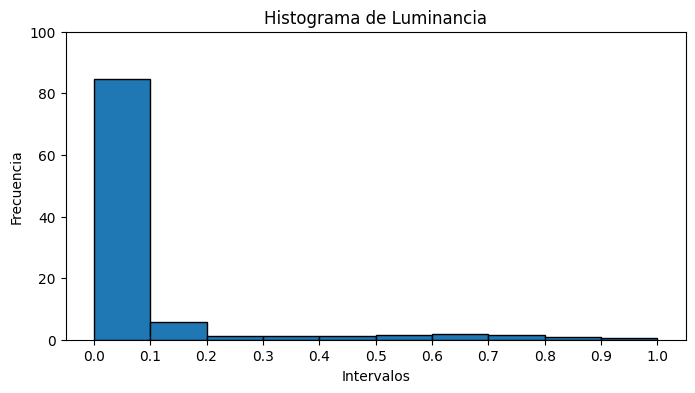

In [13]:
lum.relative(low_yiq_img, 10)

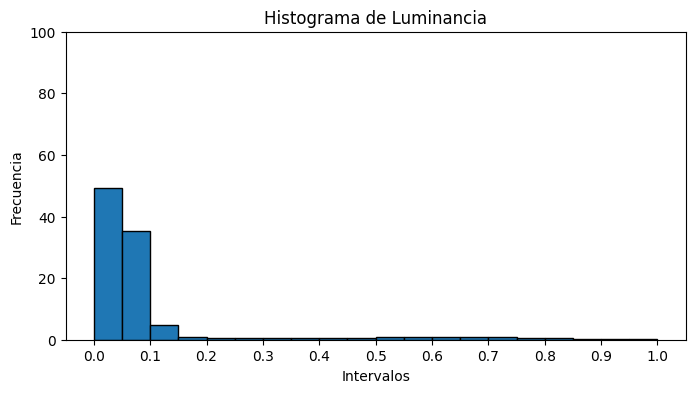

In [14]:
lum.relative(low_yiq_img, 20)

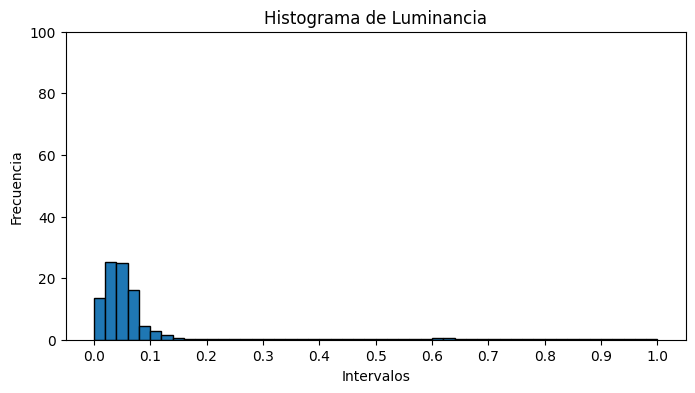

In [15]:
lum.relative(low_yiq_img, 50)

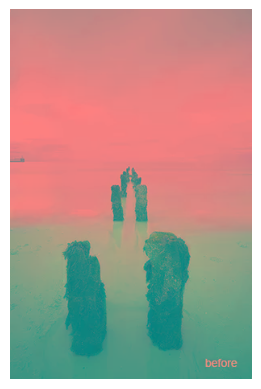

In [16]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "high_luminance.jpg")) / 255

high_yiq_img = lum.rgb_to_yiq(image)

high_yiq_img = np.clip(high_yiq_img, 0, 1)

plt.imshow(high_yiq_img)
plt.axis("off")
plt.show()

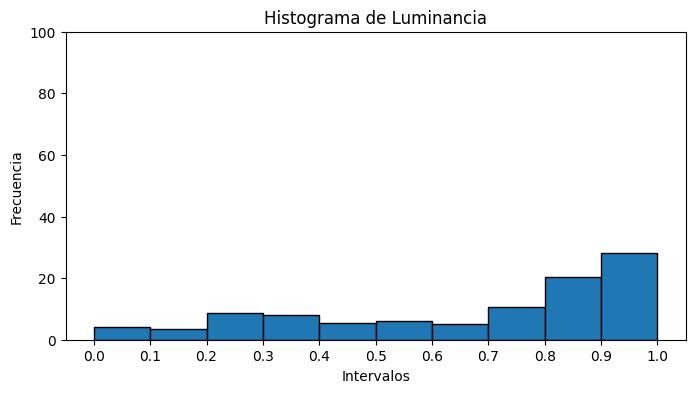

In [17]:
lum.relative(high_yiq_img, 10)

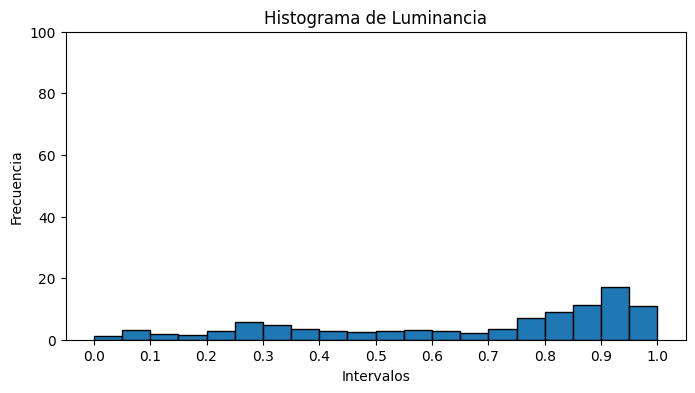

In [18]:
lum.relative(high_yiq_img, 20)

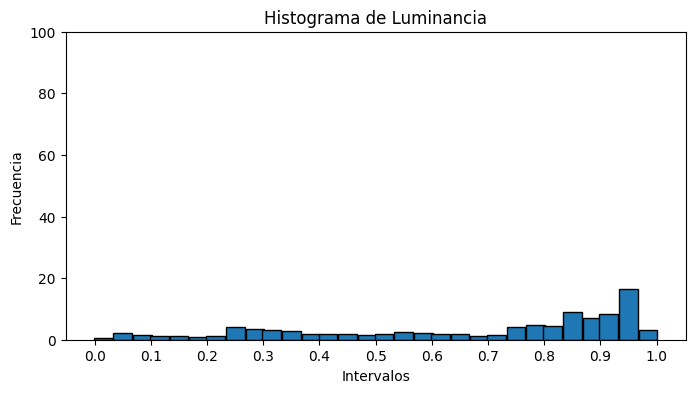

In [19]:
lum.relative(high_yiq_img, 30)

# PDI – Histograma de luminancia

Claramente uno imagina que puede corregirse la mala iluminación en la imagen simplemente subiendo o bajando la luminancia (es decir, multiplicando el Y de cada pixel por un escalar α, respectivamente mayor o menor a 1, como hicimos en la actividad práctica anterior). 

## Ejercicio propuesto: probar estas ideas con las imágenes de ejemplo.

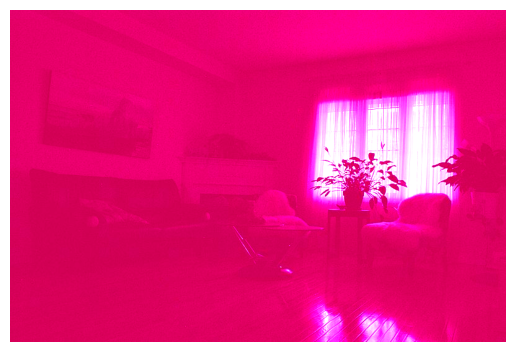

In [20]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "low_luminance.jpg")) / 255

low_yiq_img = lum.rgb_to_yiq(image)

low_yiq_img = low_yiq_img * 2

low_yiq_img = lum.yiq_to_rgb(low_yiq_img)

low_yiq_img = np.clip(low_yiq_img, 0, 1)

plt.imshow(low_yiq_img)
plt.axis("off")
plt.show()

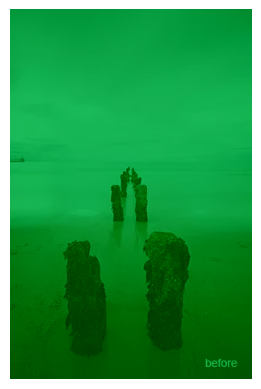

In [21]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "high_luminance.jpg")) / 255

high_yiq_img = lum.rgb_to_yiq(image)

high_yiq_img = high_yiq_img / 2

high_yiq_img = lum.yiq_to_rgb(high_yiq_img)

high_yiq_img = np.clip(high_yiq_img, 0, 1)

plt.imshow(high_yiq_img)
plt.axis("off")
plt.show()

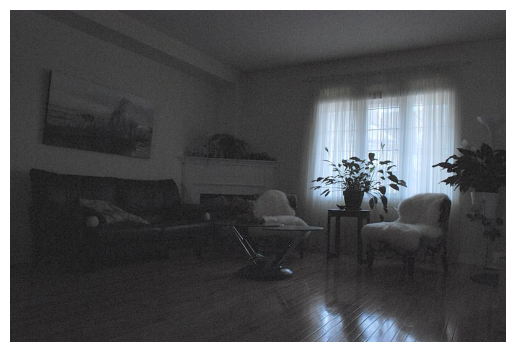

In [22]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "low_luminance.jpg")) / 255

low_yiq_img = lum.rgb_to_yiq(image)

low_yiq_img = lum.lum_transform(low_yiq_img)

low_yiq_img = lum.yiq_to_rgb(low_yiq_img)

low_yiq_img = np.clip(low_yiq_img, 0, 1)

plt.imshow(low_yiq_img)
plt.axis("off")
plt.show()

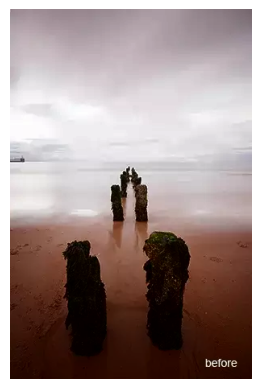

In [23]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "high_luminance.jpg")) / 255

high_yiq_img = lum.rgb_to_yiq(image)

high_yiq_img = lum.lum_transform(high_yiq_img, True)

high_yiq_img = lum.yiq_to_rgb(high_yiq_img)

high_yiq_img = np.clip(high_yiq_img, 0, 1)

plt.imshow(high_yiq_img)
plt.axis("off")
plt.show()

In [24]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "low_luminance.jpg")) / 255

low_yiq_img = lum.rgb_to_yiq(image)

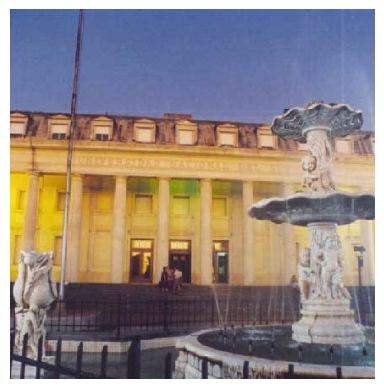

In [25]:
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "mal_contraste.jpg")) / 255

contrast_yiq_img = lum.rgb_to_yiq(image)

contrast_yiq_img = lum.trozos(contrast_yiq_img)

contrast_yiq_img = lum.yiq_to_rgb(contrast_yiq_img)

contrast_yiq_img = np.clip(contrast_yiq_img, 0, 1)

plt.imshow(contrast_yiq_img)
plt.axis("off")
plt.show()